# Development

In [5]:
# Imports
from phonopy import Phonopy
from phonopy.structure.atoms import PhonopyAtoms
from phonopy.cui.load import load

In [6]:
phonon = load("./hBN_data/phonopy.yaml", force_sets_filename="./hBN_data/FORCE_SETS")
phonon.produce_force_constants()
phonon.save()

'phonopy_params.yaml'

In [7]:
phonon = load("phonopy_params.yaml")
phonon.set_masses([30.0]*160)
phonon.run_band_structure([[[0, 0, 0]]], with_eigenvectors=True)

In [8]:
phonon.masses

array([30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30.,
       30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30.,
       30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30.,
       30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30.,
       30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30.,
       30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30.,
       30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30.,
       30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30.,
       30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30.,
       30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30.,
       30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30.,
       30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30.,
       30., 30., 30., 30.])

In [9]:
phonon.write_yaml_band_structure()

In [1]:
# phonon.write_yaml_band_structure??


In [ ]:


mass_dict = {'B': 10.0, 'N': 14.0, 'C': 12.0}
natom_dict = {'B': 2, 'N': 2, 'C': 1}
atom_seq = ['B', 'N', 'C']
masses = get_mass_array(mass_dict, natom_dict, atom_seq)
masses

[10.0, 10.0, 14.0, 14.0, 12.0]

In [ ]:
import phonopy
from phonopy.phonon.band_structure import get_band_qpoints_and_path_connections
phonon.run_band_structure(qpoints, path_connections=connections, labels=labels)
# phonon.plot_band_structure().show()

In [1]:
from defectpl.comparepl import ComparePl

In [2]:
from defectpl.defectpl import DefectPl

band_yaml = "../defectpl/tests/data/band.yaml"
contcar_gs = "../defectpl/tests/data/CONTCAR_gs"
contcar_es = "../defectpl/tests/data/CONTCAR_es"
out_dir = "./hBN_data/comp1"
EZPL = 1.95
gamma = 2
plot_all = True
iplot_xlim = [1000, 2000]

defctpl = DefectPl(
    band_yaml,
    contcar_gs,
    contcar_es,
    EZPL,
    gamma,
    iplot_xlim=iplot_xlim,
    plot_all=plot_all,
    out_dir=out_dir,
)

All plots are saved in the output directory.
Properties are saved in a json file.


In [ ]:
# For hBN with normal isotopes
from defectpl.defectpl import DefectPl

band_yaml = "./hBN_data/band.yaml"
contcar_gs = "./hBN_data/CONTCAR_gs"
contcar_es = "./hBN_data/CONTCAR_es"
out_dir = "./hBN_data/comp1"
EZPL = 3.95
gamma = 2
plot_all = True
iplot_xlim = [3000, 4000]
# iplot_xlim = None

pl = DefectPl(
    band_yaml,
    contcar_gs,
    contcar_es,
    EZPL,
    gamma,
    iplot_xlim=iplot_xlim,
    plot_all=plot_all,
    out_dir=out_dir,
)

All plots are saved in the output directory.
Properties are saved in a json file.


In [7]:
# With abnormal isotopes
from defectpl.defectpl import DefectPl

band_yaml = "./band.yaml"
contcar_gs = "./hBN_data/CONTCAR_gs"
contcar_es = "./hBN_data/CONTCAR_es"
out_dir = "./hBN_data/comp2"
EZPL = 3.95
gamma = 2
plot_all = True
iplot_xlim = [3000, 4000]
# iplot_xlim = None

pl = DefectPl(
    band_yaml,
    contcar_gs,
    contcar_es,
    EZPL,
    gamma,
    iplot_xlim=iplot_xlim,
    plot_all=plot_all,
    out_dir=out_dir,
)

All plots are saved in the output directory.
Properties are saved in a json file.


In [9]:
type(defctpl.I)

numpy.ndarray

In [2]:
data = pl.to_json(out_dir="./")

Properties are saved in a json file.


In [4]:
data.keys()

dict_keys(['class', 'frequencies', 'iprs', 'localization_ratio', 'qks', 'Sks', 'S_omega', 'omega_range', 'I', 'resolution', 'delta_R', 'delta_Q', 'HR_factor', 'dR', 'EZPL', 'gamma', 'natoms', 'masses', 'max_energy'])

### Interactive Intensity

In [1]:
# from defectpl.defectpl import plot_interactive_intensity
# filename = "properties.json"
# plot_interactive_intensity(filename, xlim = None)


### Compare intensity

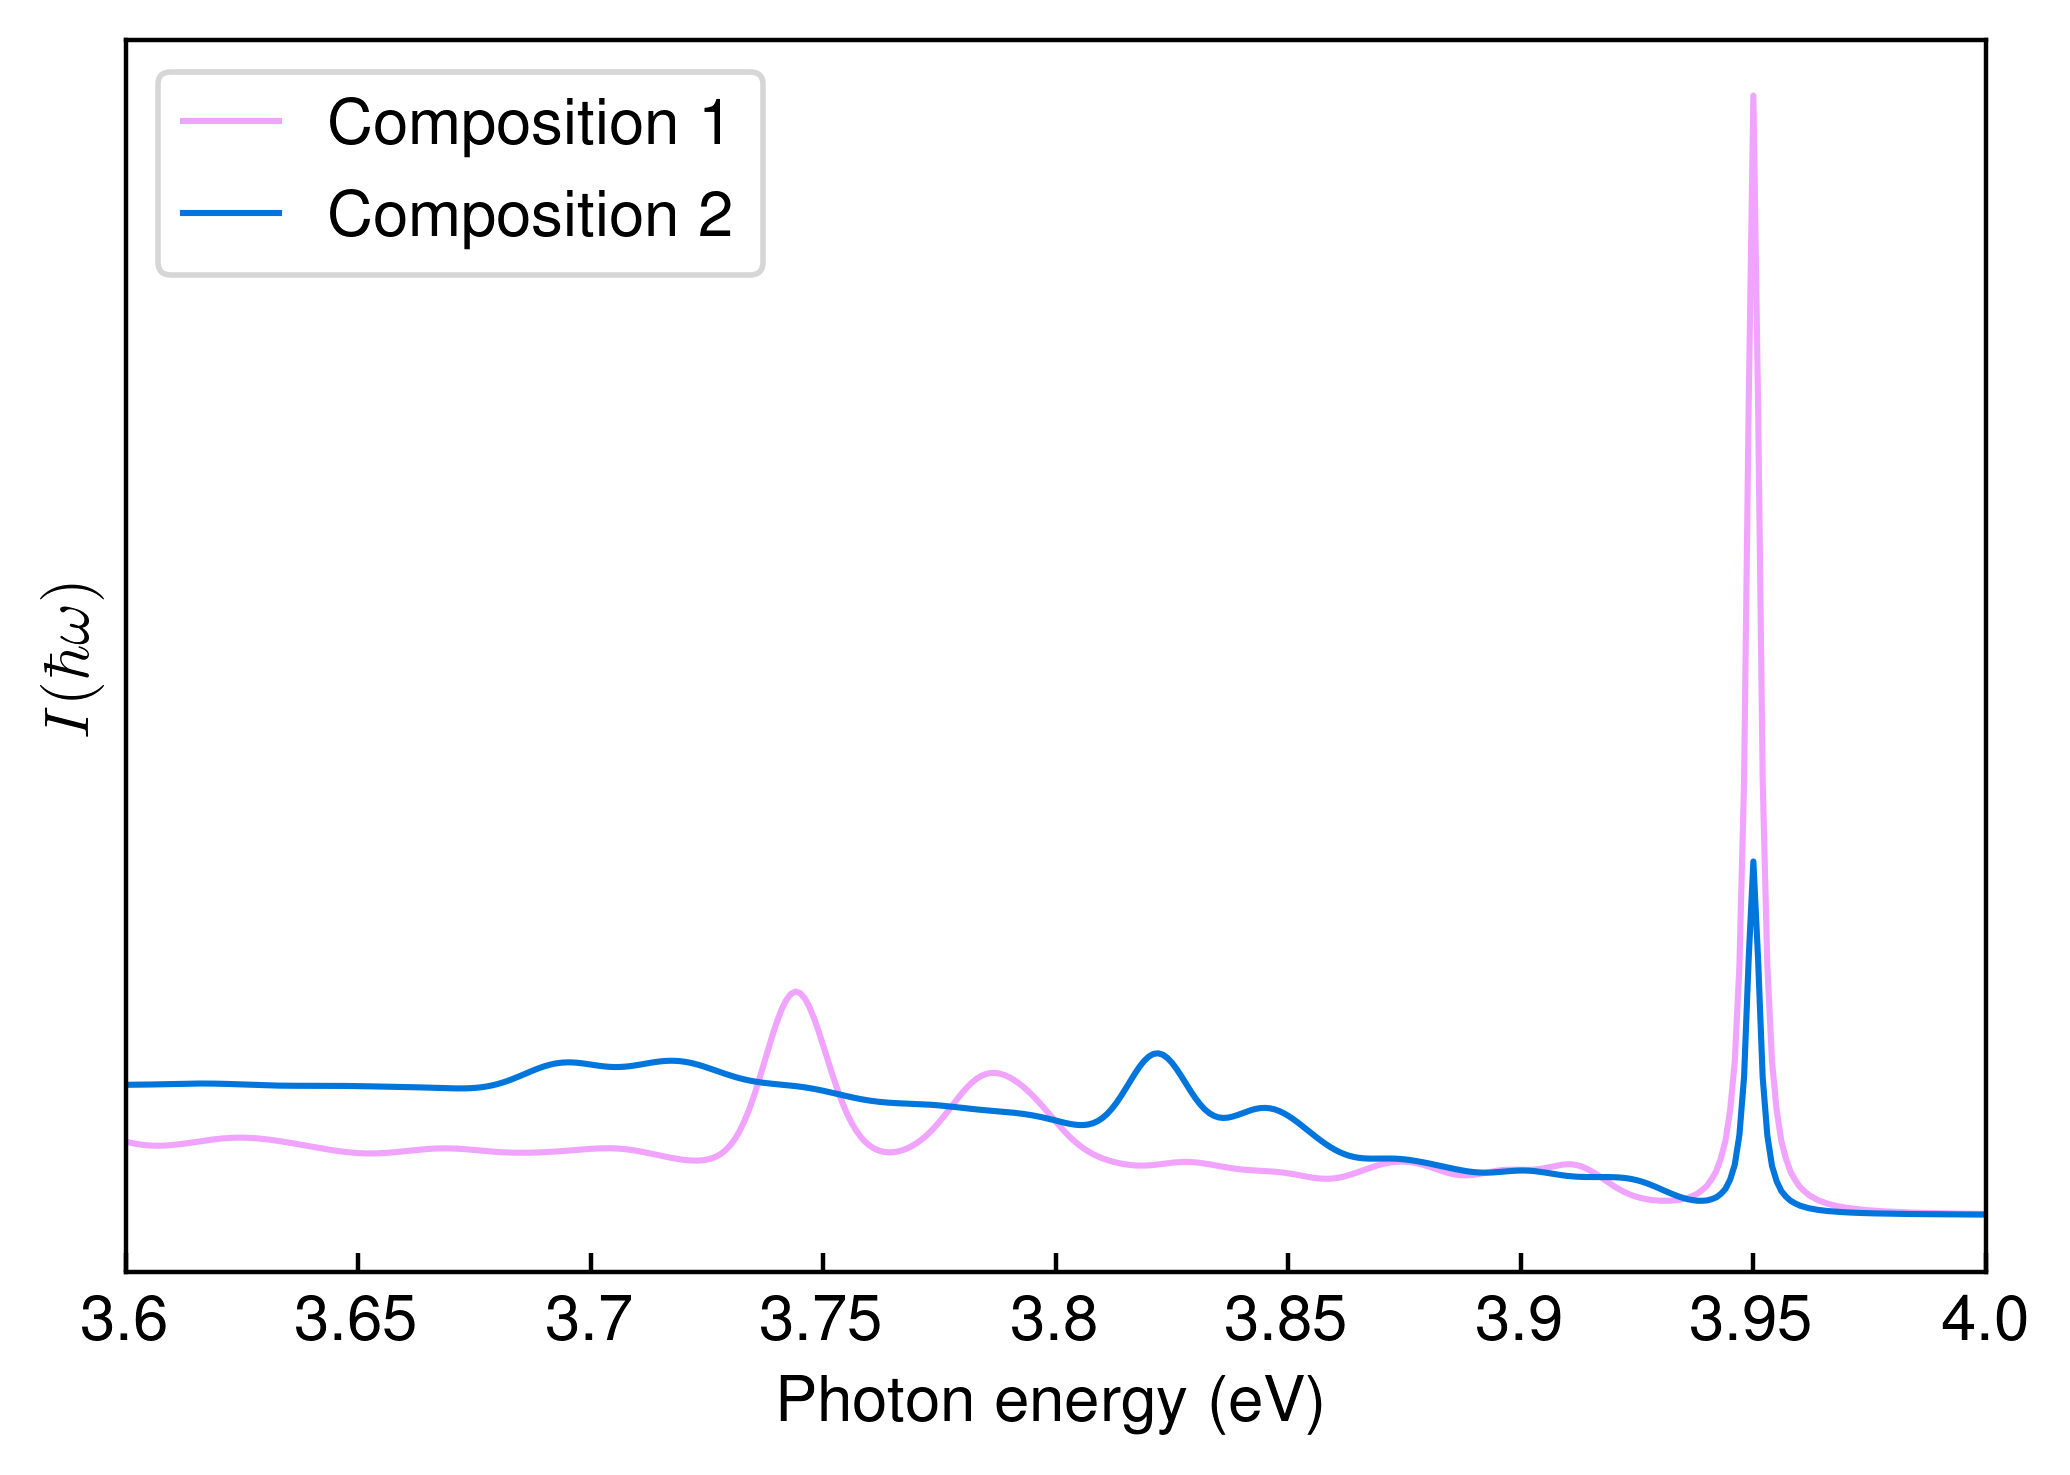

In [4]:
from defectpl.defectpl import comparepl
properties_files = ["./hBN_data/comp1/properties.json", "./hBN_data/comp2/properties.json"]
comparepl(properties_files, xlim = [3600, 4000])

### Do the Isotope Substitution Analysis

In [1]:
# Generate the band.yaml files for different compositions
from defectpl.defectpl import *
from pymatgen.io.vasp.inputs import Poscar
poscar = Poscar.from_file("./hBN_data/CONTCAR_gs")

In [ ]:
natoms_dict = poscar.structure.composition.as_dict()
natoms_dict = {key: int(value) for key, value in natoms_dict.items()}
atom_seq = list(natoms_dict.keys())
mass_dicts = gen_all_possible_mass_dict(species=atom_seq)
mass_arrays = get_all_mass_arrays(atom_seq, natoms_dict)

Species: B(Boron)
Atomic Number: 5
Mass: 10.811
Isotopes Information:
+---------+------------+----------+
| Isotope |    Mass    | Fraction |
+---------+------------+----------+
|   10    | 10.0129371 |  0.199   |
|   11    | 11.0093055 |  0.801   |
+---------+------------+----------+


Species: N(Nitrogen)
Atomic Number: 7
Mass: 14.0067
Isotopes Information:
+---------+---------------+----------+
| Isotope |     Mass      | Fraction |
+---------+---------------+----------+
|   14    | 14.0030740074 | 0.99636  |
|   15    | 15.000108973  | 0.00364  |
+---------+---------------+----------+


Species: C(Carbon)
Atomic Number: 6
Mass: 12.0107
Isotopes Information:
+---------+--------------+----------+
| Isotope |     Mass     | Fraction |
+---------+--------------+----------+
|   12    |      12      |  0.9893  |
|   13    | 13.003354838 |  0.0107  |
+---------+--------------+----------+


Species: B(Boron)
Atomic Number: 5
Mass: 10.811
Isotopes Information:
+---------+------------+------